<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('../code')

from visualization import visualize_selectivity

# MNIST

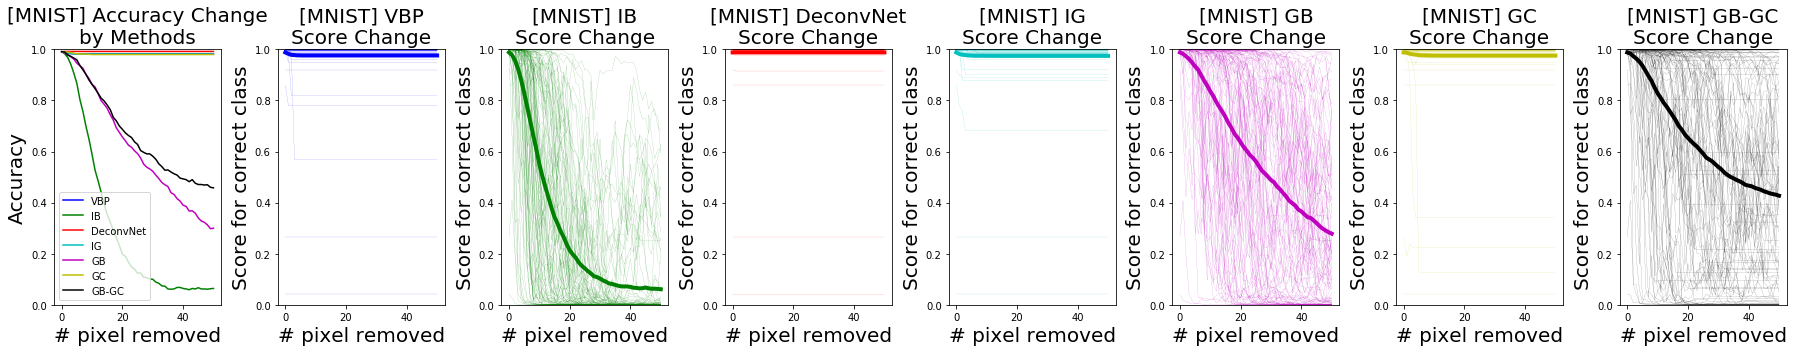

In [2]:
visualize_selectivity(target='mnist', 
                      methods=['VBP','IB','DeconvNet','IG','GB','GC','GB-GC'], 
                      steps=50, 
                      sample_pct=0.1, 
                      save_dir='../images/results/score_acc_change_mnist.jpg',
                      fontsize=20, 
                      size=(25,5), 
                      dpi=150)

# CIFAR10

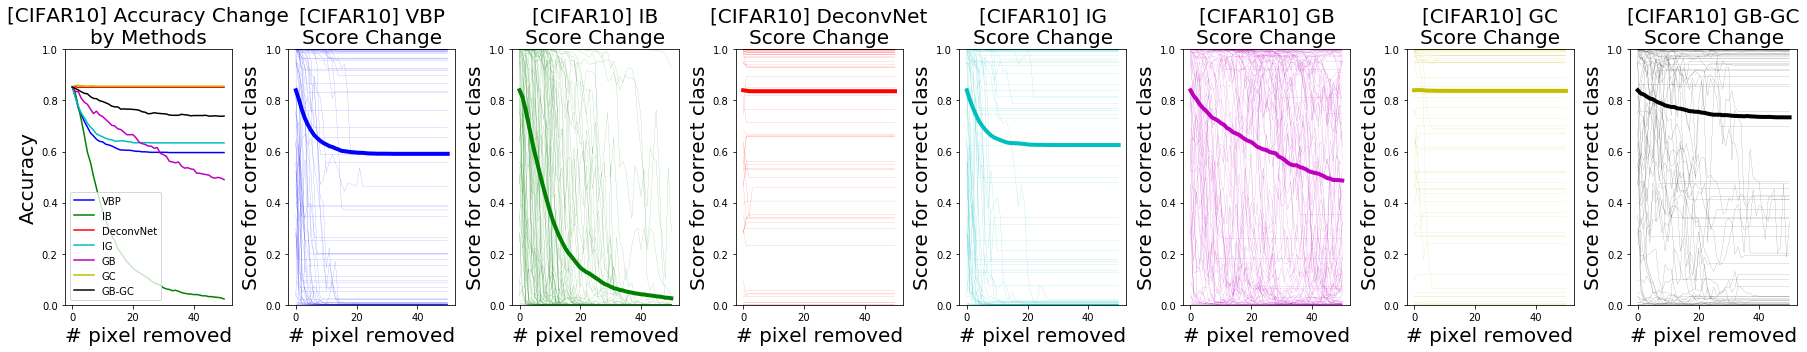

In [3]:
visualize_selectivity(target='cifar10', 
                      methods=['VBP','IB','DeconvNet','IG','GB','GC','GB-GC'], 
                      steps=50, 
                      sample_pct=0.1, 
                      save_dir='../images/results/score_acc_change_cifar10.jpg',
                      fontsize=20, 
                      size=(25,5), 
                      dpi=150)